# Task 4: Implementing Gender and Age detection

#### Dataset from Kaggle :- https://www.kaggle.com/datasets/jangedoo/utkface-new

### *Importing necessary libraries*

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

### *Importing all the labeled photo files from the given directory*

In [2]:
root_dir = 'UTKFace'
image_paths = []

In [3]:
for filename in os.listdir(root_dir):
    if filename.lower().endswith(".jpg") or filename.lower().endswith(".jpeg") or filename.lower().endswith(".png"):
        image_path = os.path.join(root_dir, filename)
        image_paths.append(image_path)

### *First 5 photos found*

In [4]:
print(len(image_paths))
image_paths[:5]

23708


['UTKFace\\100_0_0_20170112213500903.jpg.chip.jpg',
 'UTKFace\\100_0_0_20170112215240346.jpg.chip.jpg',
 'UTKFace\\100_1_0_20170110183726390.jpg.chip.jpg',
 'UTKFace\\100_1_0_20170112213001988.jpg.chip.jpg',
 'UTKFace\\100_1_0_20170112213303693.jpg.chip.jpg']

### *Extracting Age and Gender values from image name*

In [5]:
ages, genders= [], []

for i in image_paths:
    temp = i[8:].split('_')
    ages.append(temp[0])
    genders.append(temp[1])

### *Rezising each image to the size 128 x 128 and converting them into numpy arrays*

In [6]:
ages = list(map(int, ages))
genders = list(map(int, genders))

imgs = []
for i in image_paths:
    image = cv2.imread(i)
    desired_shape = (128, 128)
    resized_image = cv2.resize(image, desired_shape)
    image_array = np.array(resized_image)
    image_array = image_array.astype('float32')
    image_array /= 255
    imgs.append(image_array)

### *Splitting the photos and their label data into training and testing data*

In [7]:
X_train, X_test, A_train, A_test, G_train, G_test = train_test_split(
    imgs, ages, genders, test_size=0.2, random_state=42)

### *Converting each data into categorical format*

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)
A_train = np.array(A_train)
A_test = np.array(A_test)
G_train = np.array(G_train)
G_test = np.array(G_test)

In [9]:
print('Number of training images: {}'.format(len(X_train)))
print('Number of training ages: {}'.format(len(A_train)))
print('Number of training genders: {}'.format(len(G_train)))
print('Number of testing images: {}'.format(len(X_test)))
print('Number of testing ages: {}'.format(len(A_test)))
print('Number of testing genders: {}'.format(len(G_test)))

Number of training images: 18966
Number of training ages: 18966
Number of training genders: 18966
Number of testing images: 4742
Number of testing ages: 4742
Number of testing genders: 4742


In [10]:
imgs[0].shape

(128, 128, 3)

### *Creating a Neural Network model mainly comprising of the 2 dimensional CNNs and dense layers providing 2 outputs i.e. Age and Gender*

In [11]:
inputs = Input(((128, 128, 3)))
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)

X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Conv2D(512, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)
D1 = Dense(256, activation='relu')(X)
D2 = Dense(256, activation='relu')(X)
D3 = Dense(128, activation='relu')(D2)
Drop1 = Dropout(0.3)(D1)
Drop2 = Dropout(0.3)(D3)
Out1 = Dense(1, activation='relu', name='age_output')(Drop1)
Out2 = Dense(1, activation='sigmoid', name='gender_output')(Drop2)

model = Model(inputs=[inputs], outputs=[Out1,Out2])

In [12]:
model.compile(loss=['mae','binary_crossentropy'], optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 126, 126, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

### *Training the model with the train data*

In [14]:
history = model.fit(x=X_train, y=[A_train, G_train], batch_size = 10, epochs=20, validation_split= 0.1)

Epoch 1/20
1707/1707 [==============================] - 334s 194ms/step - loss: 14.0375 - age_output_loss: 13.3832 - gender_output_loss: 0.6543 - age_output_accuracy: 0.0451 - gender_output_accuracy: 0.6088 - val_loss: 11.7046 - val_age_output_loss: 11.1508 - val_gender_output_loss: 0.5538 - val_age_output_accuracy: 0.0511 - val_gender_output_accuracy: 0.7269
Epoch 2/20
1707/1707 [==============================] - 325s 191ms/step - loss: 10.3197 - age_output_loss: 9.8525 - gender_output_loss: 0.4671 - age_output_accuracy: 0.0452 - gender_output_accuracy: 0.7879 - val_loss: 9.6830 - val_age_output_loss: 9.2642 - val_gender_output_loss: 0.4188 - val_age_output_accuracy: 0.0511 - val_gender_output_accuracy: 0.8028
Epoch 3/20
1707/1707 [==============================] - 331s 194ms/step - loss: 9.3002 - age_output_loss: 8.9000 - gender_output_loss: 0.4002 - age_output_accuracy: 0.0472 - gender_output_accuracy: 0.8156 - val_loss: 8.4552 - val_age_output_loss: 8.0622 - val_gender_output_loss:

### *Accuracy and loss of the above training run*

In [15]:
loss, a_loss, g_loss, a_accuracy, g_accuracy = model.evaluate(X_test, [A_test, G_test])
print(f'Loss: {loss}')
print(f'Age Accuracy: {a_accuracy}')
print(f'Gender Accuracy: {g_accuracy}')

149/149 [==============================] - 19s 130ms/step - loss: 7.1983 - age_output_loss: 6.8506 - gender_output_loss: 0.3477 - age_output_accuracy: 0.0458 - gender_output_accuracy: 0.8372
Loss: 7.198297023773193
Age Accuracy: 0.04576128348708153
Gender Accuracy: 0.8371995091438293


### *Testing with an image of a 22 year old woman*

1/1 [==============================] - 1s 507ms/step
Age : 24
Gender : Female


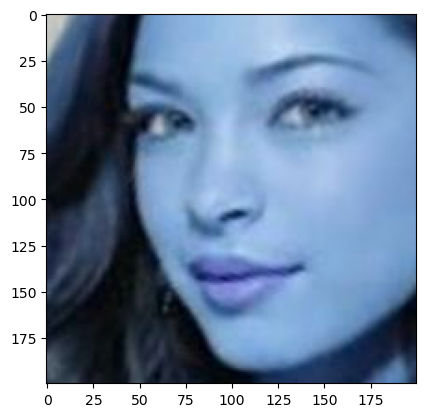

In [16]:
image = cv2.imread('UTKFace\\22_1_2_20170103212729188.jpg.chip.jpg')
plt.imshow(image)
resized_image = cv2.resize(image, (128, 128))
image_array = np.array(resized_image)
image_array = image_array.astype('float32')
image_array /= 255
image_array.shape
image_array = np.expand_dims(image_array, axis=0)
age_pred, gender_pred = model.predict(image_array)
print("Age : {}".format(int(np.around(age_pred[0][0], 0))))
print("Gender : {}".format("Male" if int(np.around(gender_pred[0][0], 0)) == 0 else "Female"))

### *Testing with an image of a 40 year old man*

1/1 [==============================] - 0s 45ms/step
Age : 45
Gender : Male


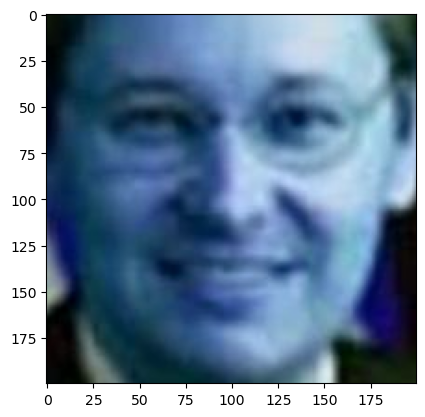

In [18]:
image = cv2.imread('UTKFace\\40_0_0_20170117203837280.jpg.chip.jpg')
plt.imshow(image)
resized_image = cv2.resize(image, (128, 128))
image_array = np.array(resized_image)
image_array = image_array.astype('float32')
image_array /= 255
image_array.shape
image_array = np.expand_dims(image_array, axis=0)
age_pred, gender_pred = model.predict(image_array)
print("Age : {}".format(int(np.around(age_pred[0][0], 0))))
print("Gender : {}".format("Male" if int(np.around(gender_pred[0][0], 0)) == 0 else "Female"))

### *Testing with an image of a 52 year old woman*

1/1 [==============================] - 0s 26ms/step
Age : 51
Gender : Female


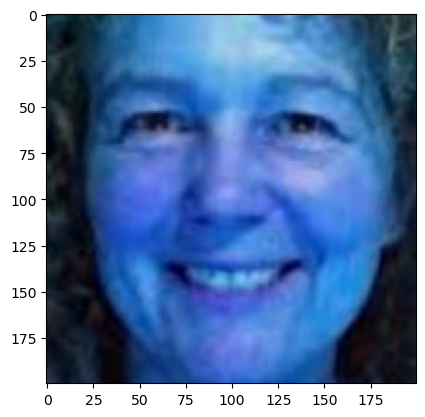

In [19]:
image = cv2.imread('UTKFace\\52_1_0_20170105173045268.jpg.chip.jpg')
plt.imshow(image)
resized_image = cv2.resize(image, (128, 128))
image_array = np.array(resized_image)
image_array = image_array.astype('float32')
image_array /= 255
image_array.shape
image_array = np.expand_dims(image_array, axis=0)
age_pred, gender_pred = model.predict(image_array)
print("Age : {}".format(int(np.around(age_pred[0][0], 0))))
print("Gender : {}".format("Male" if int(np.around(gender_pred[0][0], 0)) == 0 else "Female"))